# Lab 4 Correlation
## PSU DS 200 Fall 2020

### Instructor: Professor John Yen
### TA: Rupesh Prajapati
### LA: Nathan Tack

## Acknnowledgement: 
This lab is a modified version of a lab of UC Berkeley data 8 course.

## Total 7 Exercises:
- Exercise 1: 5 points
- Exercies 2: 5 points
- Exercise 3: 6 points
- Exercise 4: 5 points
- Exercise 5: 5 points
- Exercise 6: 10 points
- Exercise 7: 9 points

## Total 45 points

## Due: 5 pm September 21

# Learning Objectives of the Lab
- Be able to perform some data cleaning for correlation analysis.
- Be able to apply correlation analysis to a dataset.
- Be able to interpret the result of a correlation analysis.
- Be able to compute correlation coefficient of two columns.
- Be able to use the result of correlation analysis to gain insights that may be useful for predictive modeling.

In [1]:
!pip install datascience

     |████████████████████████████████| 71kB 2.0MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp36-none-any.whl size=79980 sha256=0763039cfb167542cb491eb6e6a6dd28d01b23f61935bda4b4eece1a471f05e2
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [2]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


# 1. How Faithful is Old Faithful? 

Old Faithful is a geyser in Yellowstone National Park that is famous for eruption on a fairly regular schedule. Run the cell below to see Old Faithful in action!

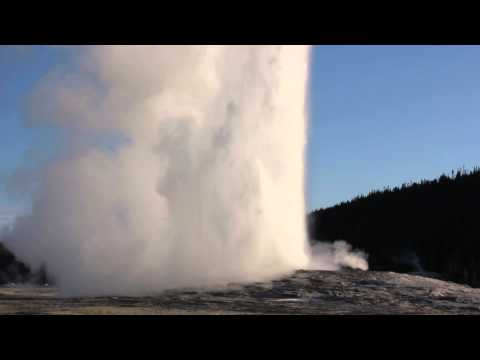

In [3]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others. Whenever there is a long eruption, it usually followed by an even longer wait before the next eruption.
If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park in the meantime instead of waiting by the geyser. 

In this lab, we will use a dataset on eruption durations and waiting times to see if we can find a correlation between the wait time and the duration time.  The dataset has one row for each observed eruption. It includes the following columns:
- duration: Eruption duration, in minutes.
- wait: Time between this eruption and the next, also in minutes.

Like previous labs, you need to download the data (faithful.csv) to your computer, then upload it to your Google Drive under DS200Labs folder.

# Mount Google Drive

Like previous labs, we need to first mount the Google Drive in Colab before we can read data from Google Drive.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Copy Data Files into DS200Labs in your Google Drive

Like the previous labs, download the following data files from Canvas, upload them to DS200Labs in your Google Drive.
- faithful.csv

After you have done this, run the following "ls" command to make sure the data file is in your DS200Labs directory.  If not, carefully repeat the steps in uploading the file to DS200Labs (review these steps in Lab 1 if needed)

In [6]:
!ls /content/drive/My\ Drive/DS200Labs

faithful.csv	    player_data.csv  SFSalaries2011_2014.csv
IMDB5000movies.csv  salary_data.csv


# Read Data from DS200Labs in your Google Drive using Table.read_table

Like the previous labs, we read the data files needed for the lab from DS200Labs folder in your Google Drive.  In addition to faithful.csv file, we will also read the IMDB5000movies.csv file (used in Lab 1) and NBA player salary and performance data (used in Lab 3).

In [7]:
path1= "/content/drive/My Drive/DS200Labs/faithful.csv"
Faithful = Table.read_table(path1)
Faithful.show(10)

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


In [8]:
path2= "/content/drive/My Drive/DS200Labs/IMDB5000movies.csv"
Movies = Table.read_table(path2)
Movies.show(10)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054,English,USA,PG-13,2.37e+08,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,3.09404e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238,English,USA,PG-13,3e+08,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,2.00074e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994,English,UK,PG-13,2.45e+08,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,4.48131e+08,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police officer|terror ...,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701,English,USA,PG-13,2.5e+08,2012,23000,8.5,2.35,164000
nan,Doug Walker,nan,nan,131,nan,Rob Walker,131,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,nan,0,nan,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,nan,nan,nan,nan,nan,nan,12,7.1,nan,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,7.30587e+07,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738,English,USA,PG-13,2.637e+08,2012,632,6.6,2.35,24000
Color,Sam Raimi,392,156,0,4000,James Franco,24000,3.3653e+08,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1,1902,English,USA,PG-13,2.58e+08,2007,11000,6.2,2.35,0
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,2.00807e+08,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1,17th century|based on fairy tale|disney|flower|tower,http://www.imdb.com/title/tt0398286/?ref_=fn_tt_tt_1,387,English,USA,PG,2.6e+08,2010,553,7.8,1.85,29000
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,4.58992e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4,artificial intelligence|based on comic book|captain amer ...,http://www.imdb.com/title/tt2395427/?ref_=fn_tt_tt_1,1117,English,USA,PG-13,2.5e+08,2015,21000,7.5,2.35,118000
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,3.01957e+08,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_tt_tt_1,973,English,UK,PG,2.5e+08,2009,11000,7.5,2.35,10000


In [9]:
path3 = "/content/drive/My Drive/DS200Labs/player_data.csv"
path4 = "/content/drive/My Drive/DS200Labs/salary_data.csv"
NBAPlayers = Table.read_table(path3)
NBASalary = Table.read_table(path4)
NBAPlayers.show(10)
NBASalary.show(10)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900
Anthony Davis,21,NOP,68,696,149,100,200,95,1656
DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946
Jimmy Butler,25,CHI,65,379,212,114,36,93,1301
Damian Lillard,24,POR,82,378,507,97,21,222,1720
Russell Westbrook,26,OKC,67,488,574,140,14,293,1886
Pau Gasol,34,CHI,78,919,210,25,147,158,1446
Kyrie Irving,22,CLE,75,237,389,114,20,186,1628


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790
Carmelo Anthony,22458401
Dwight Howard,21436271
LeBron James,20644400
Chris Bosh,20644400
Chris Paul,20068563
Deron Williams,19754465
Rudy Gay,19317326


# Combine Salary and Performance Data of Basketball Players

To prepare for future correlation analysis regarding salary and performance of NBA players, we first combine the two tables into one using Join (like what we did in Lab 3). As we discussed in Lab 2, we need to make sure the format of player names are the same in these two tables.  In general, it is better to use join on unique ID to combine data involving people (since multiple persons in a dataset can have the exact same name).  For this small table, no two players have the same name.  Hence, we are OK to perform join to combine two tables regarding NBA players.

In [10]:
NBAPlayer_Perf_Sal_Table = NBASalary.join("PlayerName", NBAPlayers, "Name")
NBAPlayer_Perf_Sal_Table.show(10)

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Adreian Payne,1855320,23,TOT,32,162,30,19,9,44,213
Al Horford,12000000,28,ATL,76,544,244,68,98,100,1156
Al Jefferson,13666667,30,CHO,65,548,113,47,84,68,1082
Al-Farouq Aminu,1100602,24,DAL,74,342,59,70,62,55,412
Alan Anderson,1276061,32,BRK,74,204,83,56,5,60,545
Alec Burks,3034356,23,UTA,27,114,82,17,5,52,374
Alex Kirk,507336,23,CLE,5,1,1,0,0,0,4


In [11]:
NBAPlayers.group('Name')

Name,count
A.J. Price,1
Aaron Brooks,1
Aaron Gordon,1
Adreian Payne,1
Al Horford,1
Al Jefferson,1
Al-Farouq Aminu,1
Alan Anderson,1
Alec Burks,1
Alex Kirk,1


# Checking for Correctness of Integrating the Two Table

- It is often important to validate our assumption along every steps.  

# Exercise 1 (5 points)
- (a) Describe how you check the following assumption is correct:
    - All player names in the dataset is unique.

    Group the players on player names, and it gives count, if the player name is unique, the count will show 1, and the total rows will be the same as original table.
- (b) What would have happened if two players happen to have the same name?

    There will be 4 records, two records are correct, two are mixing information together.

## Visualize the correlation relationship between two variables using scatter plot

One way to get a sense of possible correlation relationships between two two columns in a data table is to use scatter plot, which shows each row (i.e., specific values of two variables on the same row) as a dot in a two-dimensional plot, where the x-axis and the y-axis corresponds to the two columns.

There are multiple ways to generate a scatter plot.  In this lab, we will use .scatter method of Table in the datascience module.
As shown below, the first parameter of .scatter method is the column name for the x axis of the scatter plat, and the second parameter is the column name for the y axis of the scatter plot.

```
<a Table>.scatter('column name for x axis', 'column name for y axis', fit_line='True')
```
### Learning Tip: 
    The name of the two columns need to be in side a pair of quotes, so that Python know it is a string, not a variable name. What happens if you remove the quote?

The third parameters of .scatter is 'fit_line'.  If the value of 'fit_line" is 'True', the scatter plot will also show a line that is the result of "fitting" the data (using linear regression).  The slope of the line indicates whether the correlation relationship is positive or negative.
- Positive Correlation: The fitted line has a positive slope. When X increases, Y also increases.
- Negative Correlation: The fitted line has a negative slope. When X increases, Y actually decreases.

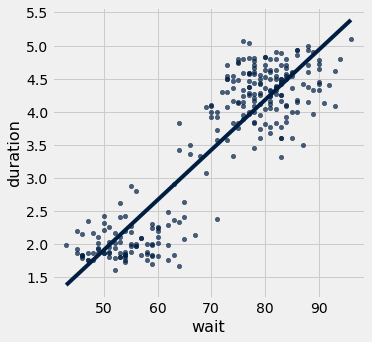

In [12]:
Faithful.scatter('wait','duration',fit_line='True')

### Learning Tip: 
    If we are interested in the possibility to predict the duration of Faithful eruption from the waiting time, it is conventional to put the column we want to predict (i.e., duration in this case) on the vertical (y) axis and the the column we want to use for prediction.
    
    For the .scatter method, this means the column we eant to predict is the second parameter (which is for the vertical y axis), and the column we want to use as input for prediction is the first parameter (which is for the horizontal x axis).
    

    

### Exercise 2 (5 points)
Are eruption duration and waiting time roughly linearly related based on the scatter plot above? Is this relationship positive?


### Answer to Exercise 2: 
Yes, they are roughly linearly related, and the relationship is positive.

# 2. What Correlates with Movie Sales?

We will use the IMDB5000 movies dataset that you red from Googl Drive earlier in this section of the lab.

### Exercise 3 (6 points)
1. Generate a scatter plot of the two variables: 'gross' (y axis) and 'movie_facebook_likes' (x axis) uising .scatter method of Table.
2. Generate a scatter plot of the two mariables: 'gross' (y axis) and 'num_voted_users' (x axis) using.scatter method.


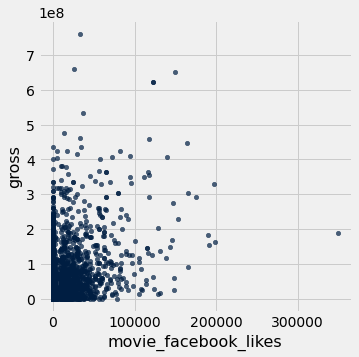

In [13]:
Movies.scatter('movie_facebook_likes','gross',fit_line='True')

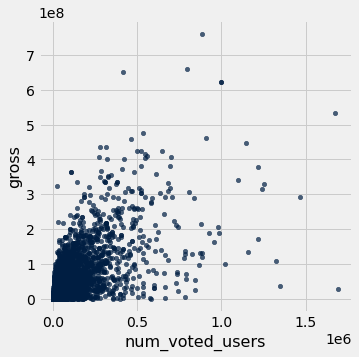

In [14]:
Movies.scatter('num_voted_users', 'gross' ,fit_line= 'True')

### Cleaning Data 

Even though we were able to generate the scatter plot, the fit line can not be generated.  One possible reasons for this is some of the movies do not have gross sales data.  To check this, we can sort the gross sales in descending order (because movies without gross sales data will have "nan" value, and they appear before numerical gross value in the sorted list of movies).

In [15]:
Movies_sorted=Movies.sort("gross",descending=True)
Movies_sorted.show(10)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,nan,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0,nan,http://www.imdb.com/title/tt2107644/?ref_=fn_tt_tt_1,3,English,USA,nan,1400,2013,0,6.3,nan,16
Color,nan,43,43,nan,319,Valorie Curry,841,nan,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_tt_tt_1,359,English,USA,TV-14,nan,nan,593,7.5,16,32000
Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,nan,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_tt_tt_1,6,English,Canada,nan,nan,2013,470,7.7,nan,84
Color,Anthony Vallone,nan,84,2,2,John Considine,45,nan,Crime|Drama,Richard Jewell,The Mongol King,36,93,Sara Stepnicka,0,jewell|mongol|nostradamus|stepnicka|vallone,http://www.imdb.com/title/tt0430371/?ref_=fn_tt_tt_1,1,English,USA,PG-13,3250,2005,44,7.8,nan,4
Color,Ash Baron-Cohen,10,98,3,152,Stanley B. Herman,789,nan,Crime|Drama,Peter Greene,Bang,438,1186,James Noble,1,corruption|homeless|homeless man|motorcycle|urban legend,http://www.imdb.com/title/tt0109266/?ref_=fn_tt_tt_1,14,English,USA,nan,nan,1995,194,6.4,nan,20
Color,Thomas L. Phillips,13,82,120,84,Joe Coffey,785,nan,Comedy|Horror|Thriller,Julianna Pitt,Sanctuary; Quite a Conundrum,133,1111,John Lucas,nan,nudity|party|pirate|swimsuit|three word title,http://www.imdb.com/title/tt2049518/?ref_=fn_tt_tt_1,8,English,USA,nan,200000,2012,98,5.4,16,424
Color,Tadeo Garcia,nan,84,5,12,Michael Cortez,21,nan,Drama,Tatiana Suarez-Pico,On the Downlow,156,62,Eric Ambriz,2,gang initiation|gunplay|hazing|latino|shakespeare's rome ...,http://www.imdb.com/title/tt0390323/?ref_=fn_tt_tt_1,3,English,USA,nan,nan,2004,20,6.1,nan,22
Black and White,Ivan Kavanagh,12,83,18,0,Michael Parle,10,nan,Horror,Patrick O'Donnell,Tin Can Man,57,15,Emma Eliza Regan,0,nan,http://www.imdb.com/title/tt1235811/?ref_=fn_tt_tt_1,1,English,Ireland,nan,10000,2007,5,6.7,1.33,105
Color,Jason Trost,42,78,91,86,Jason Trost,407,nan,Sci-Fi|Thriller,Sean Whalen,All Superheroes Must Die,1771,674,Nick Principe,0,arch villain|game of death|kidnapping|superhero,http://www.imdb.com/title/tt1836212/?ref_=fn_tt_tt_1,35,English,USA,Unrated,20000,2011,91,4,2.35,835
Black and White,Jim Chuchu,6,60,0,4,Olwenya Maina,147,nan,Drama,Paul Ogola,Stories of Our Lives,70,170,Mugambi Nthiga,0,nan,http://www.imdb.com/title/tt3973612/?ref_=fn_tt_tt_1,1,Swahili,Kenya,nan,15000,2014,19,7.4,nan,45


### Remove Movies without Gross Sales
To remove movies without gross sales data (this is often referred to as "missing data" in Data Science), we can select movies whose gross sales are greater than 0.  The movies with "nan" as gross vaues will fail the test.  This way, only movies with gross sales data will be selected using.

### Exercise 4 (5 points)
Complete the code below so that only movies with actual gross sales data are selected in the filtered table (i.e., stored in the variable Movies_cleaned).

In [16]:
Movies_cleaned=Movies_sorted.where("gross",are.above(0))
Movies_cleaned.show(10)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054,English,USA,PG-13,2.37e+08,2009,936,7.9,1.78,33000
Color,James Cameron,315,194,0,794,Kate Winslet,29000,6.58672e+08,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_tt_tt_1,2528,English,USA,PG-13,2e+08,1997,14000,7.7,2.35,26000
Color,Colin Trevorrow,644,124,365,1000,Judy Greer,3000,6.52177e+08,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0,dinosaur|disaster film|experiment gone wrong|jurassic pa ...,http://www.imdb.com/title/tt0369610/?ref_=fn_tt_tt_1,1290,English,USA,PG-13,1.5e+08,2015,2000,7,2,150000
Color,Joss Whedon,703,173,0,19000,Robert Downey Jr.,26000,6.2328e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_tt_tt_1,1722,English,USA,PG-13,2.2e+08,2012,21000,8.1,1.85,123000
Color,Joss Whedon,703,173,0,19000,Robert Downey Jr.,26000,6.2328e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_tt_tt_1,1722,English,USA,PG-13,2.2e+08,2012,21000,8.1,1.85,123000
Color,Christopher Nolan,645,152,22000,11000,Heath Ledger,23000,5.33316e+08,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0,based on comic book|dc comics|psychopath|star died befor ...,http://www.imdb.com/title/tt0468569/?ref_=fn_tt_tt_1,4667,English,USA,PG-13,1.85e+08,2008,13000,9,2.35,37000
Color,George Lucas,320,136,0,1000,Liam Neeson,20000,4.74545e+08,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,37723,Ian McDiarmid,1,alien|character says i have a bad feeling about this|han ...,http://www.imdb.com/title/tt0120915/?ref_=fn_tt_tt_1,3597,English,USA,PG,1.15e+08,1999,14000,6.5,2.35,13000
Color,George Lucas,282,125,0,504,Peter Cushing,11000,4.60936e+08,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,13485,Kenny Baker,1,death star|empire|galactic war|princess|rebellion,http://www.imdb.com/title/tt0076759/?ref_=fn_tt_tt_1,1470,English,USA,PG,1.1e+07,1977,1000,8.7,2.35,33000
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,4.58992e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4,artificial intelligence|based on comic book|captain amer ...,http://www.imdb.com/title/tt2395427/?ref_=fn_tt_tt_1,1117,English,USA,PG-13,2.5e+08,2015,21000,7.5,2.35,118000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,4.48131e+08,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police officer|terror ...,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701,English,USA,PG-13,2.5e+08,2012,23000,8.5,2.35,164000


### Exercise 5 (5 points)
Use the filtered movie table (i.e., Movies_cleaned) that contains only movies with actual gross data, generate 
(1) the scatter plot of num_voted_users and gross with fit_line='True"
(2) the scatter plot of movie_facebook_likes and gross with fit_line='True'

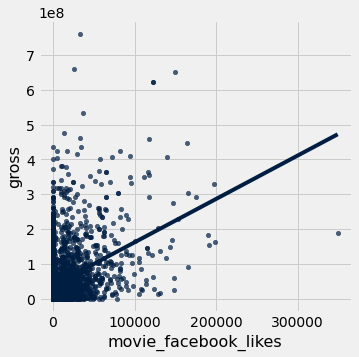

In [17]:
Movies_cleaned.scatter('movie_facebook_likes','gross',fit_line="True")

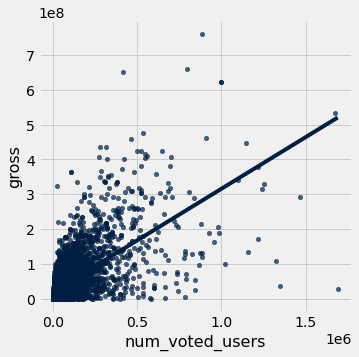

In [18]:
Movies_cleaned.scatter('num_voted_users', 'gross', fit_line='True')

# 3. Correlation Analysis regarding Salaray and Performance of NBA Players

Suppose we would like to find correlation relationships between performance and salary of NBA players.  Earlier in this notebook, you have already merged the performance data and the salary data of a set of NBA players.  You have also checked, in Exercise 1, that the combined table using player name to join is correct (i.e., there was no incorrect entries due to multiple players having the same name). What are the columns related to performance of NBA players?  

In [19]:
NBAPlayer_Perf_Sal_Table.show(10) 


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Adreian Payne,1855320,23,TOT,32,162,30,19,9,44,213
Al Horford,12000000,28,ATL,76,544,244,68,98,100,1156
Al Jefferson,13666667,30,CHO,65,548,113,47,84,68,1082
Al-Farouq Aminu,1100602,24,DAL,74,342,59,70,62,55,412
Alan Anderson,1276061,32,BRK,74,204,83,56,5,60,545
Alec Burks,3034356,23,UTA,27,114,82,17,5,52,374
Alex Kirk,507336,23,CLE,5,1,1,0,0,0,4


# Creating New Useful Features 

Sometime it can be useful to think about what additional features can be useful.  We give an example below.

First, let us check what is its relationship between Turnovers and Salary.

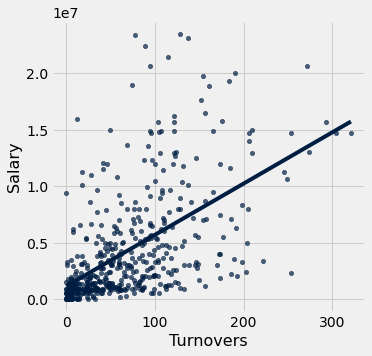

In [20]:
NBAPlayer_Perf_Sal_Table.scatter("Turnovers", "Salary", fit_line=True)

Does it make sense that salary increases as an NBA players create more turnovers?

This observation motivates us to create a new column that more accurately accounts for the negative factors of a player's turnover.  One possibility may be to create a ratio between Turnovers and Points.  This is similar to the idea of using the ratio of Turover to Touchdown (or points gained) for evaluating NFL Quarterbacks. 

One issue for calculating turnover ratio is that some players do not have any points (i.e., they have 0 points).  This is a problem for calculating the ratio since we can not divide a number by 0. There 
are multiple ways to handle this issue.  As an intial investigation
of whether it is even useful to create turnover ratio, we remove those players who do not have scores.  

In [21]:
Non_zero_Players = NBAPlayer_Perf_Sal_Table.where("Points", are.above(0))
Non_zero_Players.show(15)

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Adreian Payne,1855320,23,TOT,32,162,30,19,9,44,213
Al Horford,12000000,28,ATL,76,544,244,68,98,100,1156
Al Jefferson,13666667,30,CHO,65,548,113,47,84,68,1082
Al-Farouq Aminu,1100602,24,DAL,74,342,59,70,62,55,412
Alan Anderson,1276061,32,BRK,74,204,83,56,5,60,545
Alec Burks,3034356,23,UTA,27,114,82,17,5,52,374
Alex Kirk,507336,23,CLE,5,1,1,0,0,0,4


How many players were removed?

Next, we apply a lambda function (in a way similar to the calculation of average salary in Lab 2) to compute the ratio between Turnovers and Points for each player.

In [22]:
Turnover_Ratios = Non_zero_Players.apply(lambda x, y: x/y, "Turnovers", "Points")
Turnover_Ratios

array([0.10526316, 0.16457023, 0.1563786 , 0.20657277, 0.08650519,
       0.06284658, 0.13349515, 0.11009174, 0.13903743, 0.        ,
       0.1712963 , 0.11059908, 0.15575621, 0.08928571, 0.13692946,
       0.11470588, 0.15850144, 0.1372549 , 0.33333333, 0.10619469,
       0.14569536, 0.29295775, 0.20175439, 0.09767442, 0.33333333,
       0.25118483, 0.12371134, 0.12761355, 0.12080537, 0.05736715,
       0.04810127, 0.10580913, 0.20779221, 0.07407407, 0.14099783,
       0.11207729, 0.17829457, 0.12264151, 0.10177404, 0.15759312,
       0.13855422, 0.14710744, 0.13636364, 0.17105263, 0.10347175,
       0.11142857, 0.1779661 , 0.12785863, 0.0625    , 0.09584296,
       0.20422535, 0.14240506, 0.17663551, 0.36666667, 0.28571429,
       0.11875   , 0.08414239, 0.4       , 0.15      , 0.11320755,
       0.07749469, 0.1754386 , 0.24390244, 0.3       , 0.10735586,
       0.11004785, 0.09213251, 0.10652174, 0.13888889, 0.09257473,
       0.1420765 , 0.06947891, 0.10722101, 0.125     , 0.10237

We can now add this new feature (Turnover Ratio) as a new column to the NBA Players table that excludes those with 0 Points.

In [23]:
Extended_Non_zero_Players=Non_zero_Players.with_column("TurnoverRatio", Turnover_Ratios)
Extended_Non_zero_Players.show(10)

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,TurnoverRatio
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133,0.105263
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954,0.16457
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243,0.156379
Adreian Payne,1855320,23,TOT,32,162,30,19,9,44,213,0.206573
Al Horford,12000000,28,ATL,76,544,244,68,98,100,1156,0.0865052
Al Jefferson,13666667,30,CHO,65,548,113,47,84,68,1082,0.0628466
Al-Farouq Aminu,1100602,24,DAL,74,342,59,70,62,55,412,0.133495
Alan Anderson,1276061,32,BRK,74,204,83,56,5,60,545,0.110092
Alec Burks,3034356,23,UTA,27,114,82,17,5,52,374,0.139037
Alex Kirk,507336,23,CLE,5,1,1,0,0,0,4,0


What is the correlationship relationship between TurnoverRatio and Salary?  

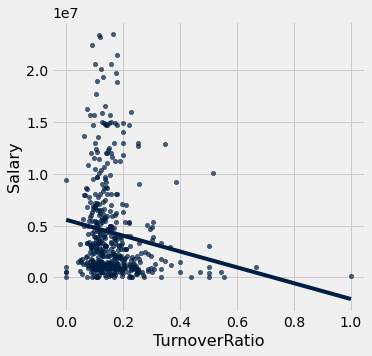

In [24]:
Extended_Non_zero_Players.scatter('TurnoverRatio', 'Salary', fit_line=True)

### Exercise 6 A (4 points)

For the entire set of NBA players in the dataset, plot the scatter plot between 'salary' (as *Y* axis) and 'Points' (as X axis) with fit_line='True' to see whether there is a correlation relationship between them.


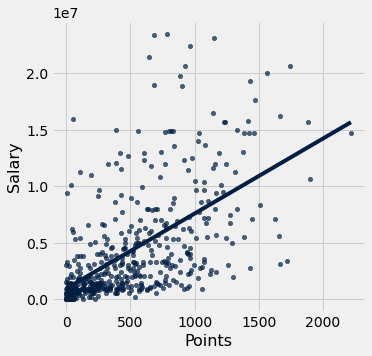

In [25]:
NBAPlayer_Perf_Sal_Table.scatter('Points', 'Salary', fit_line=True)

## Exercise 6 B (6 points)
Select a player performance data that is different from Points and Turnovers, generate the scatter plot and discuss how does the correlation relationship compare with that of 6 A.

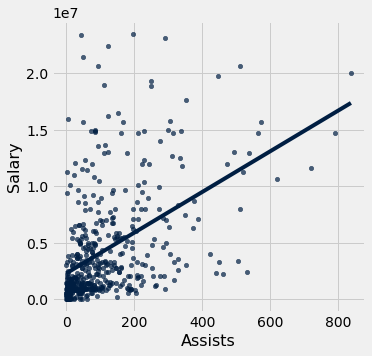

In [26]:
NBAPlayer_Perf_Sal_Table.scatter('Assists','Salary',fit_line= True)

### Answer to Exercise 6:

- (A) The correlation relationship is positive.
- (B) The correlation relationship between Assists and Salary is positive.

# Strength of Correlation

One of the most important question for correlation analysis is "How strong is the correlation relationship between these two variables?"  The answer to this question can be very useful in multiple ways:
- A variable who has a strong correlation with the prediction varialbe can be a good feature to be included in predictive modeling.
- Two variables who are very strongly correlated with each other need further processing (e.g., dimension reduction using techniques such as Principle Component Analysis) before they can be used together for predictive modeling through linear regression.

## Correlation Coefficient 

Correlation Coefficients (e.g., Parson's correlation coefficient) provide a standard way to answer the question regarding the strength of correlation relationship between any two variables.  Many statistical analysis tools (e.g., R, SAS) provide convenient ways to compute correlation coefficient.  In this lab, we use .corr method associated with Python DataFrame.
In the following code cells, we will use this method to compute correlation coefficient as follows:
- Select two columns from a table that we wish to compute their Parson's correlation coefficient.
- Convert the two-column table into a DataFrame, using .to_df method of Tables.
- Apply .corr() to the data frame to compute the Parson's correlation coefficient between the two variable.

The output of the .corr() is a matrix.  The diagnonal elements of the matrix is the Parson's Correlation Coefficient for between a variable and itself.  Therefore, it is perfectly correlated (hence, correlation coefficent is 1).  

In [27]:
Projected_NBA_Sal_Perf_Table = NBAPlayer_Perf_Sal_Table.select('Salary', 'Points')
Projected_NBA_Sal_Perf_Table.show(10)

Salary,Points
62552,133
1145685,954
3992040,243
1855320,213
12000000,1156
13666667,1082
1100602,412
1276061,545
3034356,374
507336,4


In [28]:
NBA_Perf_Sal_DF = Projected_NBA_Sal_Perf_Table.to_df()
NBA_Perf_Sal_DF.shape

(492, 2)

In [29]:
NBA_Perf_Sal_DF.corr()


,Salary,Points
Salary,1.000000,0.588069
Points,0.588069,1.000000


### Exercise 7 (9 points)


Select a performance column for NBA players different from Points and Turnovers, complete the following tasks and answer questions posted.
- (a) Complete the code cell below to compute its correlation coefficient with Salary.
- (b) Compare the correlation coefficient with that for Salary, and discuss what you learn about the relative strength of correlation Points and the performance index you chose.
- (c) If you were asked to predict salary of NBA players using only one performance index, between Points and the one you chose for Exercise 7, which one will you choose.

In [30]:
Sal_Perf_Table2= NBAPlayer_Perf_Sal_Table.select("Salary","Assists")
Sal_Perf_Table2.show(10)

Salary,Assists
62552,46
1145685,261
3992040,33
1855320,30
12000000,244
13666667,113
1100602,59
1276061,83
3034356,82
507336,1


In [31]:
Sal_Perf_Table2_df = Sal_Perf_Table2.to_df()
Sal_Perf_Table2_df.shape

(492, 2)

In [32]:
Sal_Perf_Table2_df.corr()

,Salary,Assists
Salary,1.000000,0.475382
Assists,0.475382,1.000000


### Answer to Exercise 7
- (b): Type your answer for Exercise 7 (b) here.

The correlation coefficient between salary and points is 0.588069, and the coefficient between salary and assists is 0.475382. The correlation coefficient between points and salary is higher than which between salary and assists, so the points and salary has stronger relationship than the other.
- (c): Type your answer for Exercise 7 (c) here.

I will choose Points.